<a href="https://colab.research.google.com/github/MahdiImen/MahdiImen.github.io/blob/main/GODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip Images

In [2]:
! jar xvf "/content/all_data.zip"

Streaming output truncated to the last 5000 lines.
 inflated: all_data/cvPiwdbUYagFFFz.JPG
 inflated: all_data/cvtXmpsCaHqIXhN.JPG
 inflated: all_data/CWcCPuRIelvjbUh.JPG
 inflated: all_data/CWDndxzJZyghBZQ.JPG
 inflated: all_data/CWggZiyNlXKJvmv.JPG
 inflated: all_data/CwgsVvoltZhQrds.JPG
 inflated: all_data/cwHXPIqlAnvsXfe.JPG
 inflated: all_data/CwKhvymmZWxSXaR.JPG
 inflated: all_data/cwvtGrzHtYBDzgp.JPG
 inflated: all_data/cWyUqCIjfJrEUmT.JPG
 inflated: all_data/cxDQDhRvqMiUTtc.JPG
 inflated: all_data/CXIzTKuTrbzhPHz.JPG
 inflated: all_data/cxlvrFEWAaZPXpP.JPG
 inflated: all_data/cxNjNEobxfWYcuX.JPG
 inflated: all_data/cXPHwVdGZOgUvoa.JPG
 inflated: all_data/cxPkBVOjmmUEHtQ.JPG
 inflated: all_data/cXPNumxhuiuoLdR.JPG
 inflated: all_data/CXPTUArTsUjjygJ.JPG
 inflated: all_data/CXqjeZtNfFWKngU.JPG
 inflated: all_data/cycpMAkFuBYzcnE.JPG
 inflated: all_data/cyJQFhrvcEtJMXP.JPG
 inflated: all_data/CYoYZaQkIHNWIMZ.JPG
 inflated: all_data/CyymvOmXUvKrPQe.JPG
 inflated: all_data/CZicQgCTr

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

# Load data, split it, extract data

In [2]:
train_df = pd.read_csv("train_ids_labels.csv")

In [3]:
x = train_df['Image_ID']
Y = train_df['Label']

In [4]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42)

In [5]:
#Get train images names
x_train_names = x_train.values
#Get test images names
x_test_names = x_test.values

# Crop and visualise data

In [6]:
T_crop, B_crop, L_crop, R_crop = 250, 365, 300, 700
H = B_crop - T_crop
L = R_crop - L_crop
D = 3

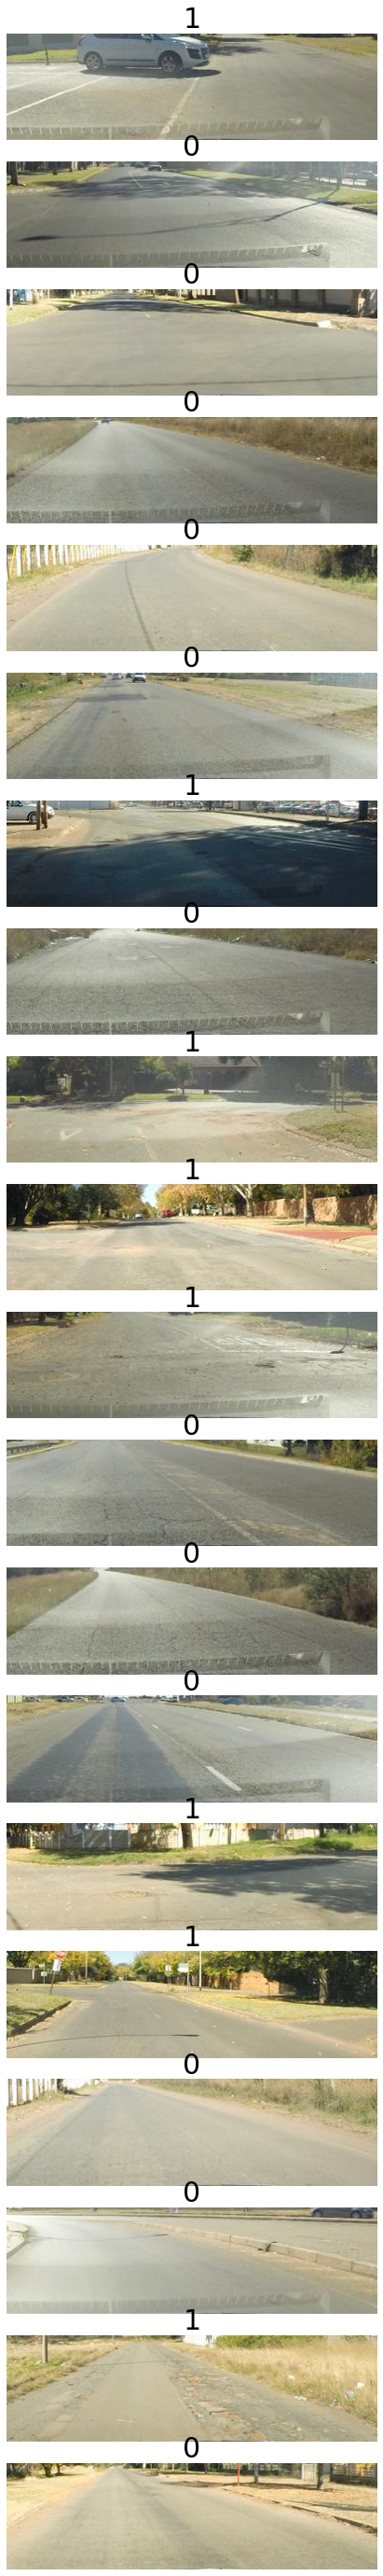

In [7]:
plt.figure(figsize=(100,50))
num_images = 20
for i in range(num_images):
    ID = x_train_names[i]
    image = mpimg.imread('/content/all_data/'+ID+'.JPG')
    label = train_df[train_df.Image_ID == ID].values[0][1]
    
    plt.subplot(num_images, 1 , i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image[T_crop:B_crop,L_crop:R_crop])

In [8]:
train_size = Y_train.shape[0]
x_train = np.empty((train_size, H, L, D))
for i in range(train_size):
    ID = x_train_names[i]
    x_train[i] = (mpimg.imread('all_data/'+ID+'.JPG'))[T_crop:B_crop,L_crop:R_crop] / 255

In [9]:
test_size = Y_test.shape[0]
x_test = np.empty((test_size, H, L, D))
for i in range(test_size):
    ID = x_test_names[i]
    x_test[i] = (mpimg.imread('all_data/'+ID+'.JPG'))[T_crop:B_crop,L_crop:R_crop] / 255

# Build model

In [10]:
model = Sequential()
model.add(Conv2D(35, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(H, L, D)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(10, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 115, 400, 35)      980       
                                                                 
 batch_normalization (BatchN  (None, 115, 400, 35)     140       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 200, 35)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 200, 25)       7900      
                                                                 
 dropout (Dropout)           (None, 58, 200, 25)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 58, 200, 25)      1

In [12]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x_train, Y_train, verbose = 1, epochs = 8, validation_data = (x_test,Y_test))

Epoch 1/8
101/101 [==============================] - 23s 127ms/step - loss: 0.9733 - accuracy: 0.8000 - val_loss: 4.7376 - val_accuracy: 0.5943
Epoch 2/8
101/101 [==============================] - 11s 111ms/step - loss: 0.3989 - accuracy: 0.8528 - val_loss: 0.5902 - val_accuracy: 0.7109
Epoch 3/8
101/101 [==============================] - 11s 110ms/step - loss: 0.2952 - accuracy: 0.8922 - val_loss: 0.4882 - val_accuracy: 0.7990
Epoch 4/8
101/101 [==============================] - 11s 110ms/step - loss: 0.2224 - accuracy: 0.9236 - val_loss: 0.4377 - val_accuracy: 0.8275
Epoch 5/8
101/101 [==============================] - 11s 111ms/step - loss: 0.1533 - accuracy: 0.9450 - val_loss: 1.2718 - val_accuracy: 0.7035
Epoch 6/8
101/101 [==============================] - 11s 110ms/step - loss: 0.1218 - accuracy: 0.9587 - val_loss: 0.4585 - val_accuracy: 0.8275
Epoch 7/8
101/101 [==============================] - 11s 111ms/step - loss: 0.0865 - accuracy: 0.9699 - val_loss: 0.5260 - val_accuracy:

In [14]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


# Make predictions

In [14]:
p = pd.read_csv('test_ids_only.csv')

In [15]:
pred_size = p.shape[0]
pred_names = p.Image_ID.values
pred = np.empty((pred_size, H, L, D))
for i in range(pred_size):
    ID = pred_names[i]
    pred[i] = (mpimg.imread('all_data/'+ID+'.JPG'))[T_crop:B_crop,L_crop:R_crop] / 255

In [16]:
predictions = model.predict(pred)

In [17]:
p["label"]=predictions

In [18]:
p.to_csv('submission6.csv', index=False)